### This script contains:

#### 1. Import libraries & dataset
#### 2. Creating a Categorical Plot
####     - Historical Plot
####     - Splitting up the dataset
####     - Running the Categorical Plot
####     - Findings
#### 3. Exporting the dataset

## 1. Import libraries & dataset

In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#Folder path into usable string
path = r'C:\Users\willm\Dropbox\1 Data Analytics Course\1 New York Citibike Hire'

In [3]:
#Import Hire Dataset
NYB2020_1day = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'NYB2020_1day.pkl'))

In [4]:
%matplotlib inline

## 2. Creating a Categorical Plot

### - Historical Plot

In [ ]:
#Creating a Hist Plot to see if the 'Age' variable will have enough distinction to be able to split into groups.
sns.set(rc={"figure.figsize":(14, 10)})
sns.histplot(NYB2020_1day['age'], bins = 84, kde = True)
plt.xticks(np.arange(15, 100, 1))
plt.show()

### Due to there being 85 years (and therefore, bins) it is hard to see what the approximate number of hires there are from age to age.
### Getting a better look by reducing down the Age range (and bins)

In [ ]:
#Creating a subset of users aged under 58
NYB2020_under58 = NYB2020_1day[NYB2020_1day['age']<= 58]

In [ ]:
NYB2020_under58.info()

In [ ]:
sns.set(rc={"figure.figsize":(14, 10)})
sns.histplot(NYB2020_under58['age'], bins = 43, kde = True)
plt.xticks(np.arange(15, 58, 1))
plt.show()

In [ ]:
#Set Pandas to show all rows
pd.set_option("display.max_rows", None)

In [ ]:
#Getting a count of all the ages, ordered so I can see any other pattern.
NYB2020_1day['age'].value_counts(dropna = False, ascending=True)

In [ ]:
#Resetting 'show all rows' function
pd.reset_option('display.max_rows')

### --- I am going to choose the groupings as Under 100k, 100k to 400k and 400k+

In [ ]:
#Creating a new column to allow me to GroupBy the Age column
NYB2020_1day['1col'] = "1"

In [ ]:
NYB2020_1day['1col'] = NYB2020_1day['1col'].astype('int8')

In [ ]:
#Requesting to just view 2 columns to see the new flag working
NYB2020_1day[['age', '1col']].tail(10)

In [ ]:
#Creating a GroupBy to give total uses by each 'age' in a new column.
NYB2020_1day["uses_by_age"] = NYB2020_1day.groupby("age")['1col'].transform("sum")

In [ ]:
#Requesting to just view 2 columns to see the new flag working
NYB2020_1day[['age', '1col']].tail(30)

In [ ]:
#Creating a new column to display one of three flags, depending on the uses by that Age
NYB2020_1day.loc[NYB2020_1day['uses_by_age'] > 399999, 'age_use'] = 'High Use Age'
NYB2020_1day.loc[(NYB2020_1day['uses_by_age'] > 99999) & (NYB2020_1day['uses_by_age'] <= 399999), 'age_use'] = 'Mid Use Age'
NYB2020_1day.loc[NYB2020_1day['uses_by_age'] <= 99999, 'age_use'] = 'Low Use Age'

In [ ]:
NYB2020_1day['age_use'].value_counts(dropna = False)

In [ ]:
NYB2020_1day.info()

### - Splitting up the dataset
#### This has to be done due to memory issues. A 1% split is 195k entries. 

In [5]:
np.random.seed(4)
dev = np.random.rand(len(NYB2020_1day)) <= 0.99

In [6]:
big = NYB2020_1day[dev]
small = NYB2020_1day[~dev]

In [7]:
len(big) + len(small)

19487603

In [8]:
NYB2020_1daySmall = small[['TripMins','age', 'age_use']]
NYB2020_1dayBig = big[['TripMins','age', 'age_use']]

### - Running the Categorical Plot

Wall time: 5min 22s


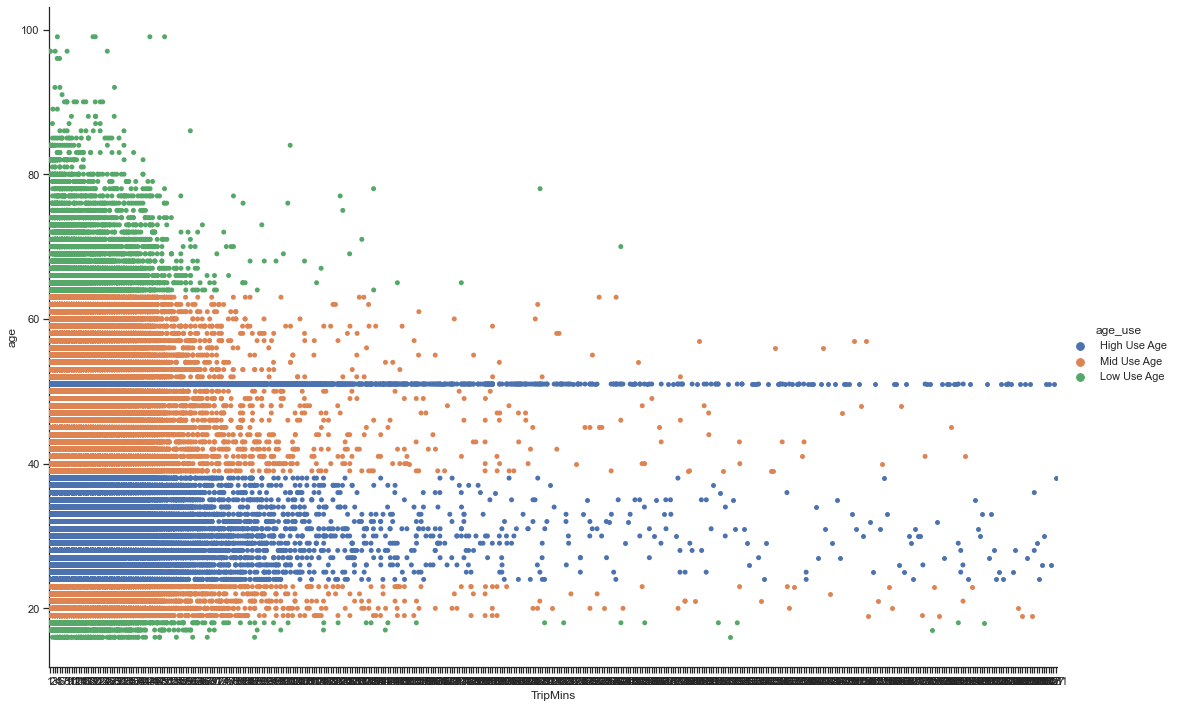

In [9]:
%%time
sns.set(style="ticks")
Mins = sns.catplot(x="TripMins", y="age", hue="age_use", height=10, aspect=1.5, data=NYB2020_1daySmall)

## - Findings
### PLEASE NOTE - THIS WAS RUN ON 1% OF THE FULL DATASET - APPROXIMATELY 195K USERS

#### It seems that our 'High Use Age's take most of the longer hires

#### From my charts in the previous Notebook, I know that that nearly full blue line is the 51 year old users, who have taken twice as many hires as any other age.

## 3. Exporting the dataset

In [10]:
NYB2020_1day.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'NYB2020_1day_Script2.pkl'))